In [1]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import splitfolders
import os
# making the directory to store the final data
if(os.path.exists("/content/drive/MyDrive/Dataset/data_final")== False):
  os.mkdir("/content/drive/MyDrive/Dataset/data_final")
  #input folder
  input_folder='/content/drive/MyDrive/Dataset/data'
  splitfolders.ratio(input_folder,output="/content/drive/MyDrive/Dataset/data_final",seed=42,ratio=(.7,.2,.1),group_prefix=None)

In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


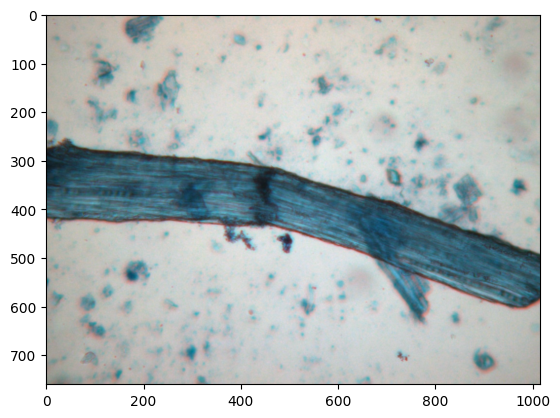

In [5]:
import cv2

img=cv2.imread("/content/drive/MyDrive/Dataset/data_final/train/Liquorice/sample1_10x1_1.jpg")
# import matplotlib.pyplot as plt

plt.imshow(img)

In [6]:
img.shape

(760, 1016, 3)

In [7]:
# re-size all the images to this
IMAGE_SIZE = [760, 1016]

train_path = '/content/drive/MyDrive/Dataset/data_final/train'
valid_path = '/content/drive/MyDrive/Dataset/data_final/val'
test_path = '/content/drive/MyDrive/Dataset/data_final/test'

In [8]:
# Import the InceptionV3 library as shown below and add preprocessing layer to the front of InceptionV3
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 5s 0us/step


In [9]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [10]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Dataset/data/*')

In [11]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [13]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 760, 1016,   0           []                               
                                3)]                                                               
                                                                                                  
 conv2d (Conv2D)                (None, 379, 507, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 379, 507, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 kB 51.4 MB/s eta 0:00:00


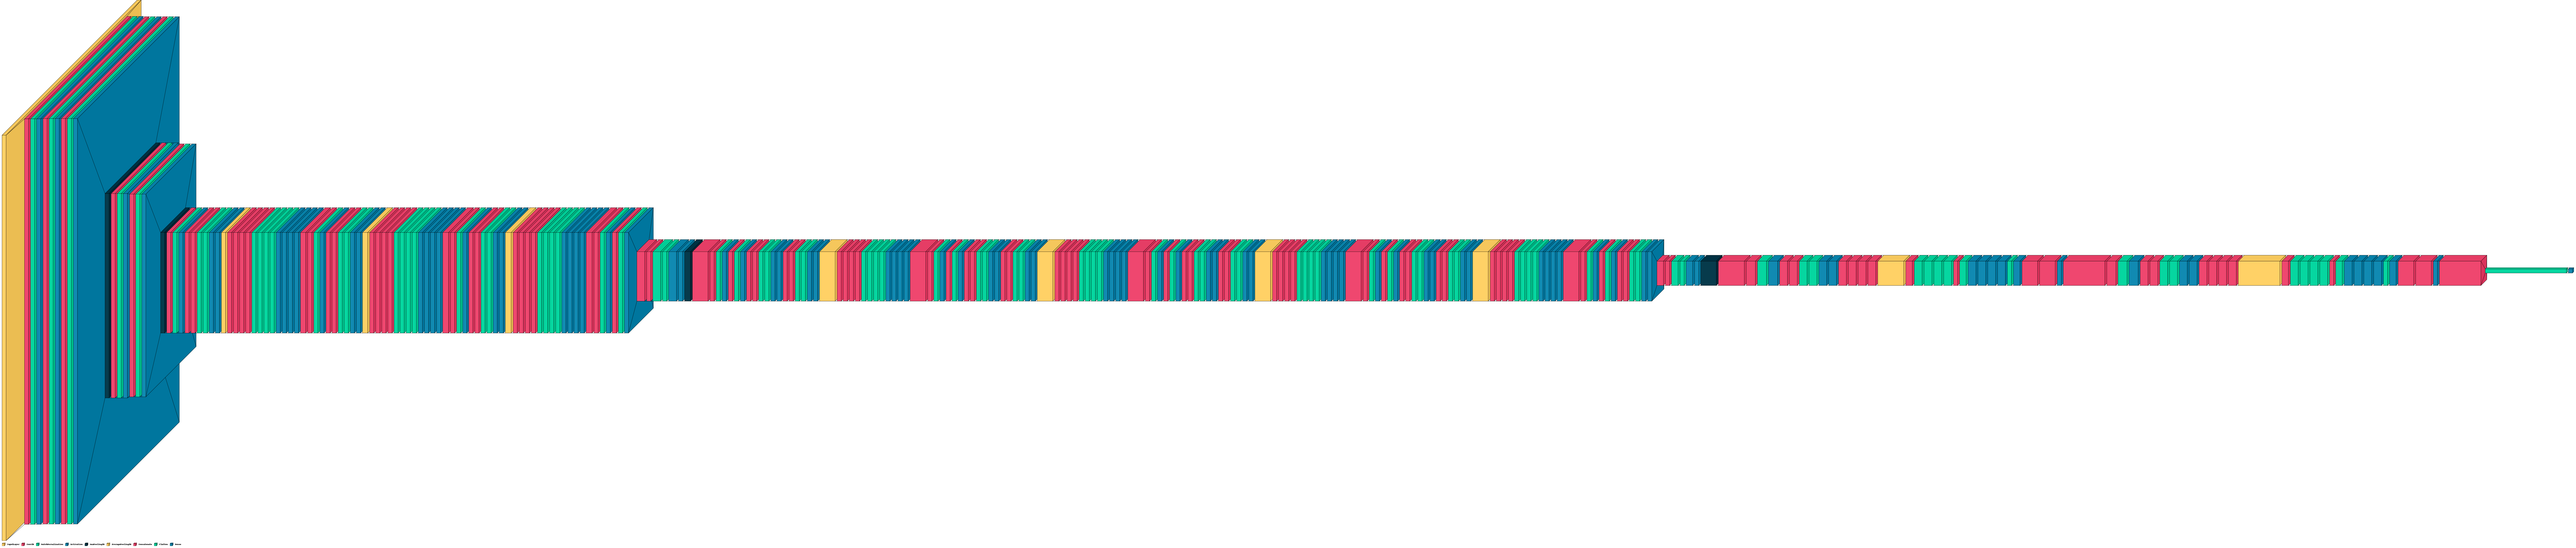

In [14]:
!pip install visualkeras
import visualkeras

from PIL import ImageFont
visualkeras.layered_view(model, legend=True)


In [15]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/data_final/train',
                                                 target_size = (760, 1016),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 470 images belonging to 2 classes.


In [18]:
val_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/data_final/val',
                                            target_size = (760, 1016),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [19]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/data_final/test',
                                            target_size = (760, 1016),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 69 images belonging to 2 classes.


In [20]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=val_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

<ipython-input-20-a8a9b98bcc43>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
30/30 [==============================] - 415s 13s/step - loss: 15.9645 - accuracy: 0.7362 - val_loss: 9.3562 - val_accuracy: 0.8433
Epoch 2/10
30/30 [==============================] - 125s 4s/step - loss: 3.0549 - accuracy: 0.9362 - val_loss: 1.6942 - val_accuracy: 0.9179
Epoch 3/10
30/30 [==============================] - 124s 4s/step - loss: 3.3257 - accuracy: 0.9340 - val_loss: 2.0490 - val_accuracy: 0.9478
Epoch 4/10
30/30 [==============================] - 125s 4s/step - loss: 1.0182 - accuracy: 0.9681 - val_loss: 1.1431 - val_accuracy: 0.9627
Epoch 5/10
30/30 [==============================] - 125s 4s/step - loss: 2.0352 - accuracy: 0.9596 - val_loss: 1.5917 - val_accuracy: 0.9627
Epoch 6/10
30/30 [==============================] - 125s 4s/step - loss: 1.0194 - accuracy: 0.9702 - val_loss: 0.5000 - val_accuracy: 0.9776
Epoch 7/10
30/30 [==============================] - 124s 4s/step - loss: 0.5873 - accuracy: 0.9872 - val_loss: 0.0140 - val_accuracy: 0.9925
Epoch 8/10


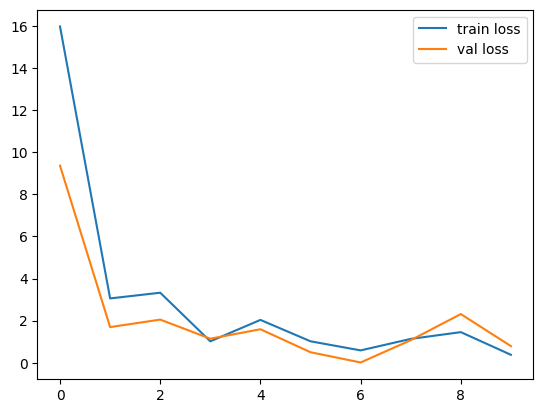

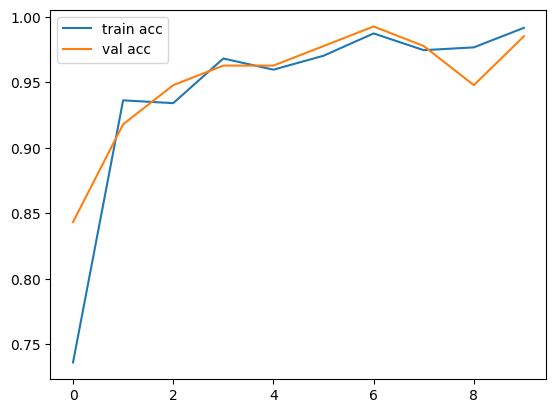

<Figure size 640x480 with 0 Axes>

In [21]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:

# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [23]:
y_pred = model.predict(test_set)

5/5 [==============================] - 51s 12s/step


In [24]:
y_pred

array([[0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [5.8233102e-20, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 5.8488422e-21],
       [1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.2677890e-37, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 2.

In [25]:
import numpy as np
y_pred_InceptionV3 = np.argmax(y_pred, axis=1)

In [26]:
y_pred_InceptionV3

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1])

In [27]:
from keras.applications.vgg16 import VGG16

In [28]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) # include_top -- false --> means output layer not added

58889256/58889256 [==============================] - 3s 0us/step


In [29]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [30]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Dataset/data/*')

In [31]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [32]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [33]:
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 760, 1016, 3)]    0         
                                                                 
 block1_conv1 (Conv2D)       (None, 760, 1016, 64)     1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 760, 1016, 64)     36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 380, 508, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 380, 508, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 380, 508, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 190, 254, 128)     0   

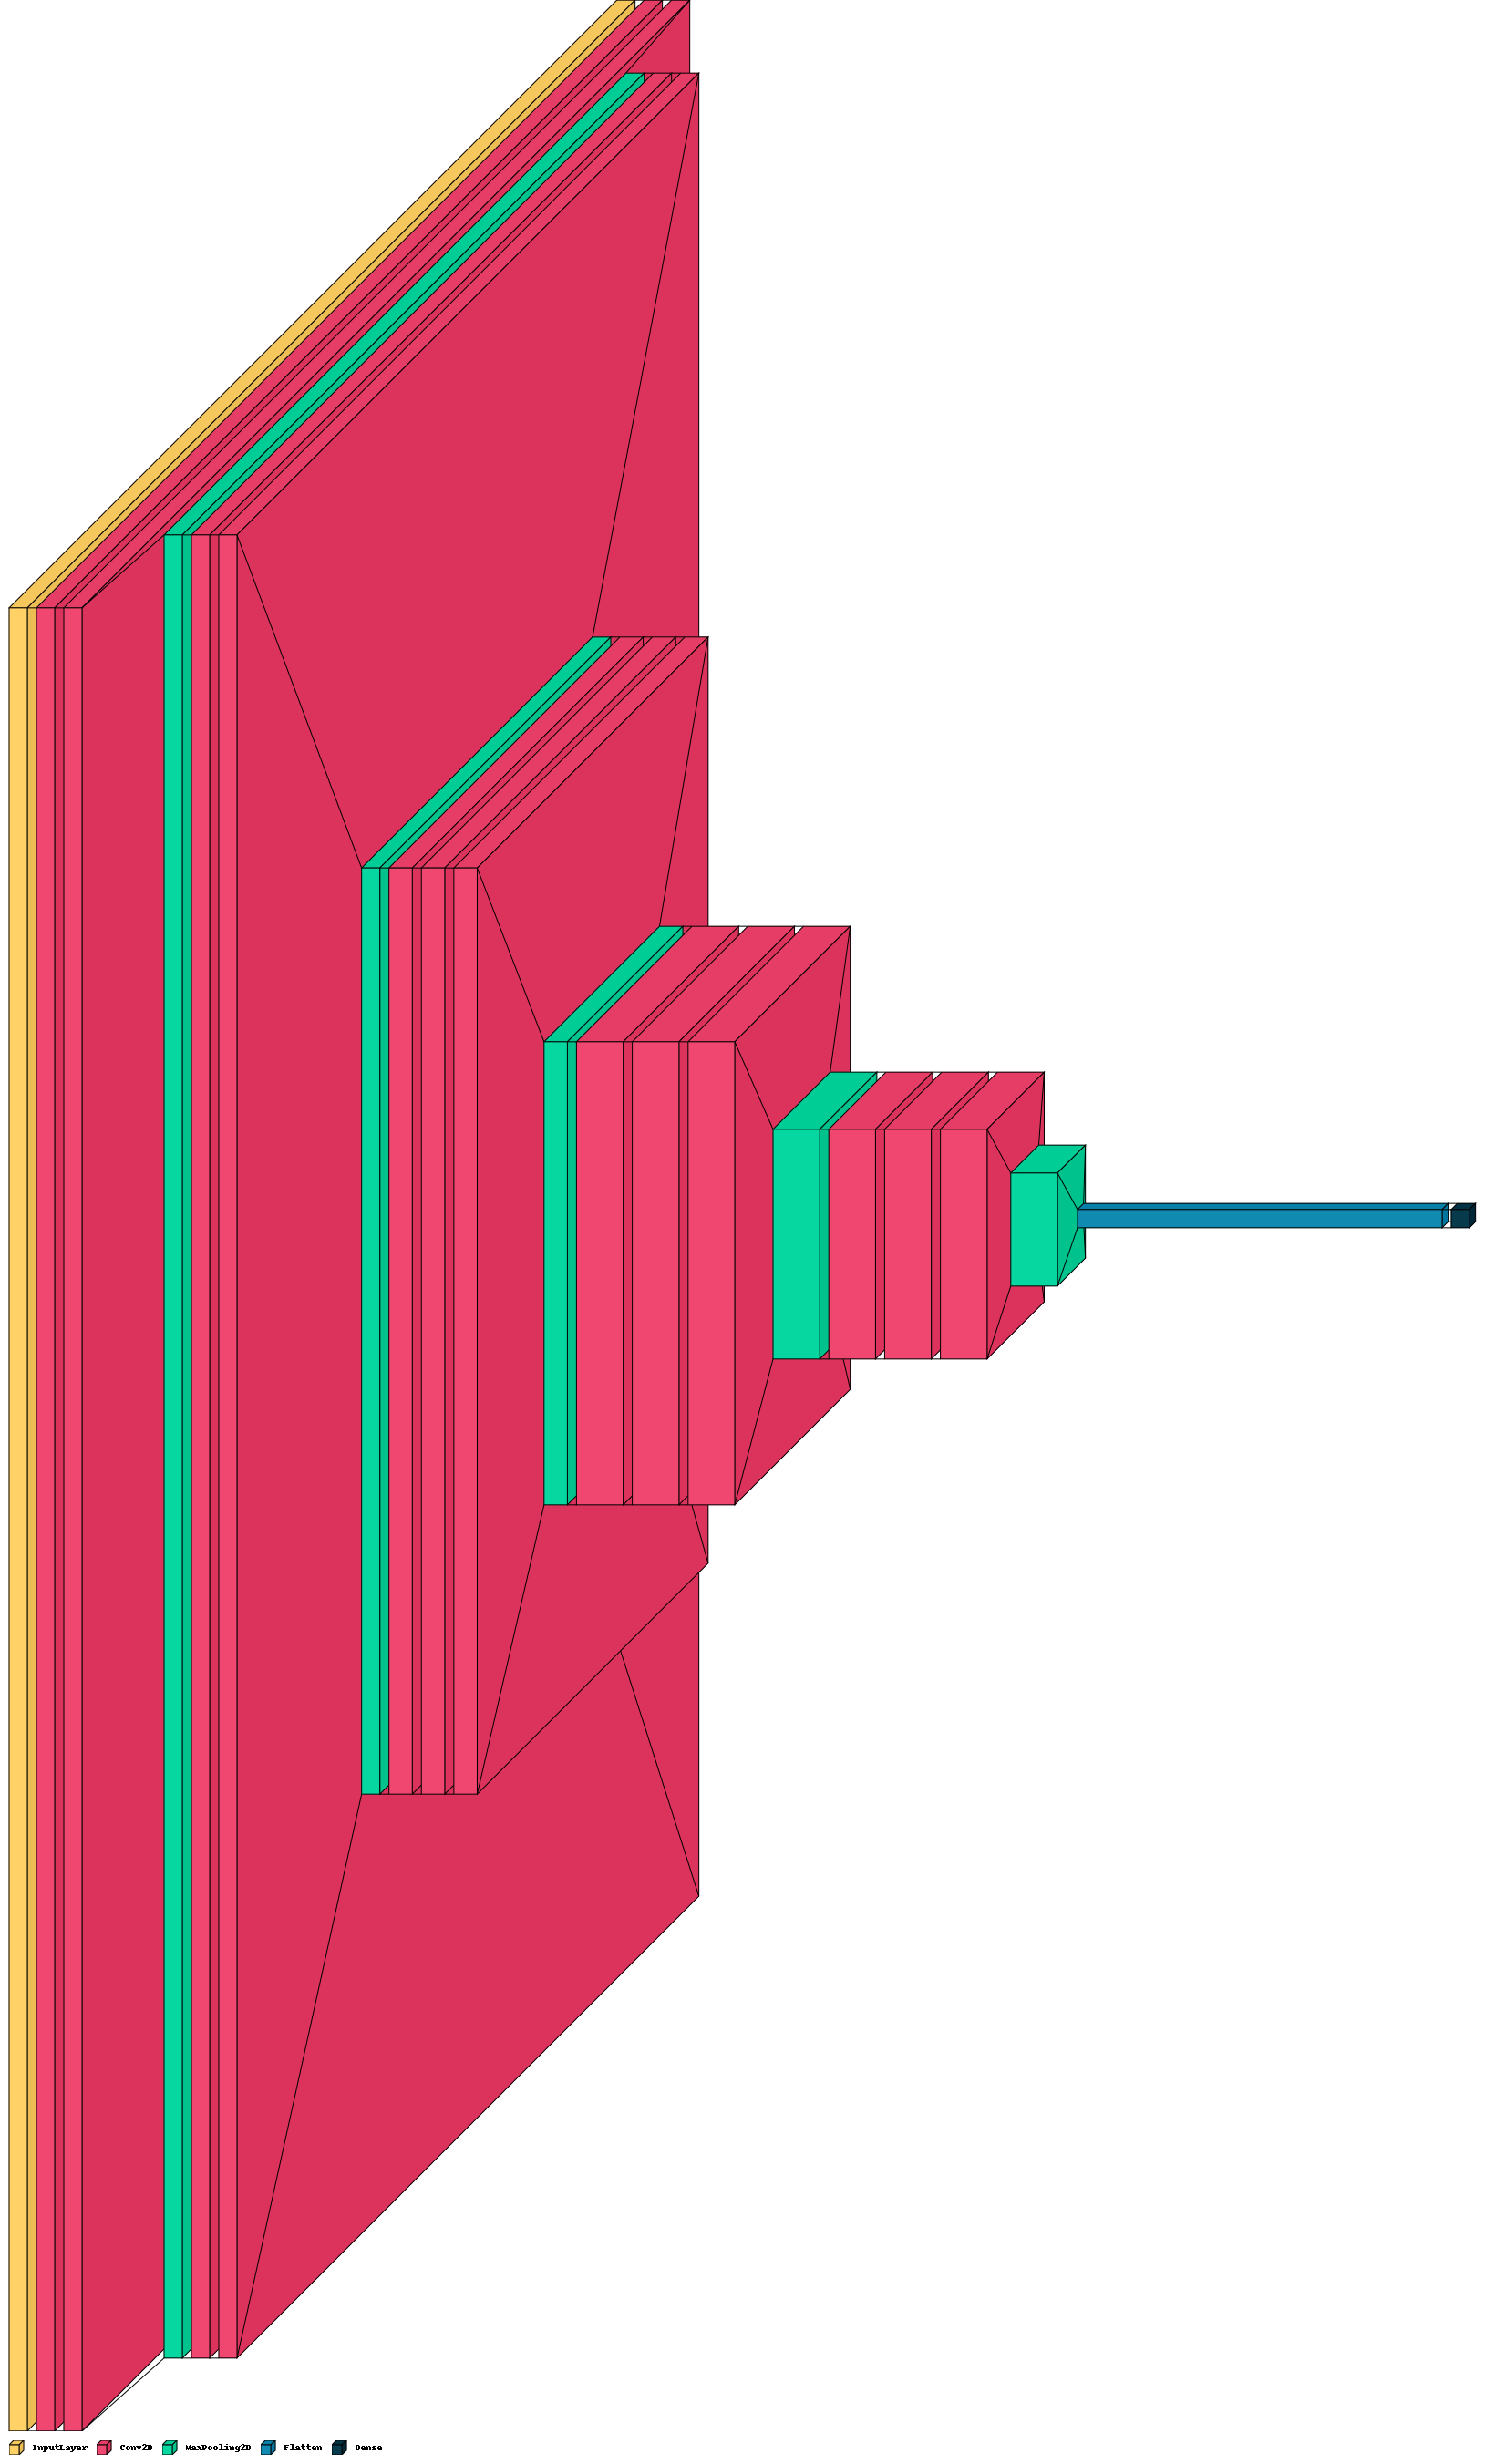

In [34]:
visualkeras.layered_view(model, legend=True)

In [35]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [36]:
r1 = model.fit_generator(
  training_set,
  validation_data=val_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

<ipython-input-36-662bb6acb397>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r1 = model.fit_generator(


Epoch 1/10
30/30 [==============================] - 164s 5s/step - loss: 3.4590 - accuracy: 0.8234 - val_loss: 0.4160 - val_accuracy: 0.9403
Epoch 2/10
30/30 [==============================] - 131s 4s/step - loss: 0.5603 - accuracy: 0.9489 - val_loss: 0.6211 - val_accuracy: 0.9254
Epoch 3/10
30/30 [==============================] - 130s 4s/step - loss: 0.1957 - accuracy: 0.9681 - val_loss: 0.0943 - val_accuracy: 0.9701
Epoch 4/10
30/30 [==============================] - 133s 4s/step - loss: 1.0865 - accuracy: 0.8681 - val_loss: 5.4468 - val_accuracy: 0.7090
Epoch 5/10
30/30 [==============================] - 132s 4s/step - loss: 0.4125 - accuracy: 0.9489 - val_loss: 1.2777 - val_accuracy: 0.9104
Epoch 6/10
30/30 [==============================] - 131s 4s/step - loss: 0.8499 - accuracy: 0.9213 - val_loss: 0.0365 - val_accuracy: 0.9925
Epoch 7/10
30/30 [==============================] - 139s 5s/step - loss: 0.4926 - accuracy: 0.9596 - val_loss: 2.3870 - val_accuracy: 0.8657
Epoch 8/10
30

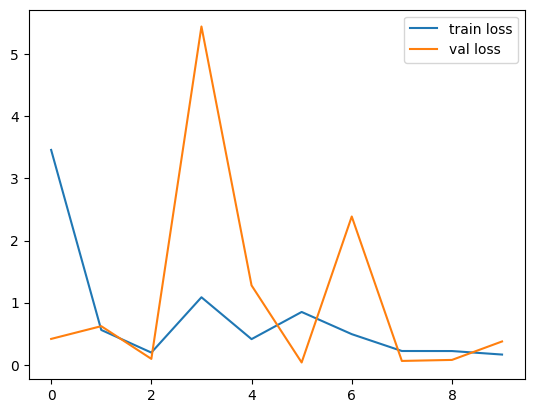

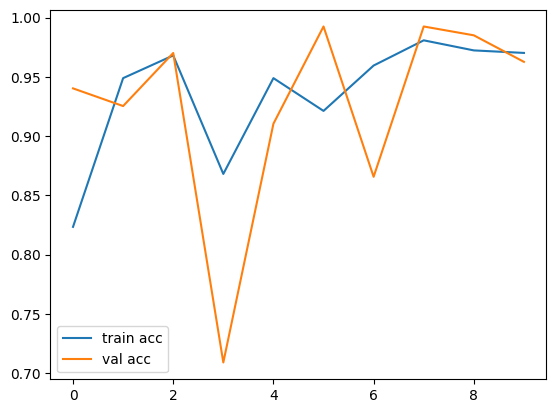

<Figure size 640x480 with 0 Axes>

In [37]:
# plot the loss
plt.plot(r1.history['loss'], label='train loss')
plt.plot(r1.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss_VGG')

# plot the accuracy
plt.plot(r1.history['accuracy'], label='train acc')
plt.plot(r1.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc_VGG')

In [38]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_VGG.h5')

In [39]:
y_pred = model.predict(test_set)

5/5 [==============================] - 17s 4s/step


In [40]:
y_pred

array([[6.7265894e-20, 1.0000000e+00],
       [1.0000000e+00, 2.6779233e-17],
       [5.5870663e-24, 1.0000000e+00],
       [1.0000000e+00, 2.3271260e-32],
       [1.3296650e-12, 1.0000000e+00],
       [1.0896248e-17, 1.0000000e+00],
       [1.0000000e+00, 2.3224399e-20],
       [3.2123635e-06, 9.9999678e-01],
       [1.5055739e-26, 1.0000000e+00],
       [5.9141261e-30, 1.0000000e+00],
       [8.4740002e-08, 9.9999988e-01],
       [1.0000000e+00, 3.3986221e-14],
       [4.3030287e-32, 1.0000000e+00],
       [1.0000000e+00, 6.3438485e-13],
       [1.0000000e+00, 4.1253876e-15],
       [1.3080443e-35, 1.0000000e+00],
       [1.0000000e+00, 2.3760486e-18],
       [1.0000000e+00, 1.9144871e-20],
       [1.9675759e-25, 1.0000000e+00],
       [2.4532171e-22, 1.0000000e+00],
       [5.8099462e-22, 1.0000000e+00],
       [1.0000000e+00, 1.5000785e-08],
       [1.0000000e+00, 7.6720054e-31],
       [1.0000000e+00, 3.1254149e-25],
       [5.9797419e-12, 1.0000000e+00],
       [1.0000000e+00, 1.

In [41]:
import numpy as np
y_pred_VGG16 = np.argmax(y_pred, axis=1)

In [42]:
y_pred_VGG16

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1])